## 3 ~ 10월 데이터 파일 불러오기, 수정, 형 변환

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import matplotlib

In [ ]:
import platform 
from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [ ]:
df = pd.read_excel('corrected_21-01-15_covid19_sido.xlsx', index_col=0)

In [ ]:
df.tail()

,사망자수,시도명(한글),시도명(중국어),시도명(영어),전일대비증감수,10만명당발생률,국내시도별발생현황고유값,기준일시,수정일시분초,확진자수,지역발생수,해외유입수,격리중환자수,격리해제수
등록일시분초,,,,,,,,,,,,,,
2021-01-15 09:39:45.839,6,전남,全南,Jeollanam-do,14,33.89,7052,2021-01-15,0,632,14,0,86,540
2021-01-15 09:39:45.839,63,경북,庆北,Gyeongsangbuk-do,23,102.95,7053,2021-01-15,0,2741,21,2,308,2370
2021-01-15 09:39:45.839,7,경남,庆南,Gyeongsangnam-do,22,51.38,7054,2021-01-15,0,1727,21,1,321,1399
2021-01-15 09:39:45.84,0,제주,济州,Jeju,1,73.5,7055,2021-01-15,0,493,1,0,48,445
2021-01-15 09:39:45.84,2,검역,隔離區,Lazaretto,5,-,7056,2021-01-15,0,2584,0,5,716,1866


### 결측치 확인, 필요없는 칼럼 제거

In [ ]:
df.isnull().sum()

사망자수            0
시도명(한글)         0
시도명(중국어)        0
시도명(영어)         0
전일대비증감수         0
10만명당발생률        0
국내시도별발생현황고유값    0
기준일시            0
수정일시분초          0
확진자수            0
지역발생수           0
해외유입수           0
격리중환자수          0
격리해제수           0
dtype: int64

In [ ]:
df=df.drop(['시도명(중국어)','시도명(영어)'], axis=1)

In [ ]:
df=df.drop(['수정일시분초'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6049 entries, 2020-03-02 19:27:57.57 to 2021-01-15 09:39:45.84
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사망자수          6049 non-null   int64         
 1   시도명(한글)       6049 non-null   object        
 2   전일대비증감수       6049 non-null   int64         
 3   10만명당발생률      6049 non-null   object        
 4   국내시도별발생현황고유값  6049 non-null   int64         
 5   기준일시          6049 non-null   datetime64[ns]
 6   확진자수          6049 non-null   int64         
 7   지역발생수         6049 non-null   int64         
 8   해외유입수         6049 non-null   int64         
 9   격리중환자수        6049 non-null   int64         
 10  격리해제수         6049 non-null   int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 567.1+ KB


#### 10만명당 발생률 데이터 중 '-'라고 되어 있는 것 NaN 값으로 바꾸기

In [ ]:
df['10만명당발생률']= df['10만명당발생률'].replace('-', 'NaN')

In [ ]:
df['10만명당발생률']= df['10만명당발생률'].replace('-\u3000', 'NaN')

In [ ]:
df['10만명당발생률']= df['10만명당발생률'].replace('\u3000-', 'NaN')

In [ ]:
df['10만명당발생률']= df['10만명당발생률'].replace('51.13.', 'NaN')
df['10만명당발생률']=df['10만명당발생률'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6049 entries, 2020-03-02 19:27:57.57 to 2021-01-15 09:39:45.84
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사망자수          6049 non-null   int64         
 1   시도명(한글)       6049 non-null   object        
 2   시도명(중국어)      6049 non-null   object        
 3   시도명(영어)       6049 non-null   object        
 4   전일대비증감수       6049 non-null   int64         
 5   10만명당발생률      5743 non-null   float64       
 6   국내시도별발생현황고유값  6049 non-null   int64         
 7   기준일시          6049 non-null   datetime64[ns]
 8   수정일시분초        6049 non-null   object        
 9   확진자수          6049 non-null   int64         
 10  지역발생수         6049 non-null   int64         
 11  해외유입수         6049 non-null   int64         
 12  격리중환자수        6049 non-null   int64         
 13  격리해제수         6049 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)


In [ ]:
df.rename(columns={'시도명(한글)':'시도명(한국어)'}, inplace=True)

## 전국 그래프 그리기

In [ ]:
from datetime import datetime

In [ ]:
def draw_df_monthly_30(month, y):
    df30 = df[(df['기준일시'] >= datetime(2020, month, 1)) & (df['기준일시'] <= datetime(2020, month, 30))]
    
    gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
    
    plt.figure(figsize=(10,8))
    
    df30_jj = df30[df30['시도명(한국어)'] == '제주']
    df30_kn = df30[df30['시도명(한국어)'] == '경남']
    df30_kb = df30[df30['시도명(한국어)'] == '경북']
    df30_jn = df30[df30['시도명(한국어)'] == '전남']
    df30_jb = df30[df30['시도명(한국어)'] == '전북']
    df30_cn = df30[df30['시도명(한국어)'] == '충남']
    df30_cb = df30[df30['시도명(한국어)'] == '충북']
    df30_kw = df30[df30['시도명(한국어)'] == '강원']
    df30_kk = df30[df30['시도명(한국어)'] == '경기']
    df30_sj = df30[df30['시도명(한국어)'] == '세종']
    df30_us = df30[df30['시도명(한국어)'] == '울산']
    df30_dj = df30[df30['시도명(한국어)'] == '대전']
    df30_kj = df30[df30['시도명(한국어)'] == '광주']
    df30_ic = df30[df30['시도명(한국어)'] == '인천']
    df30_dg = df30[df30['시도명(한국어)'] == '대구']
    df30_bs = df30[df30['시도명(한국어)'] == '부산']
    df30_sl = df30[df30['시도명(한국어)'] == '서울']

    plt.plot(df30_dg['기준일시'], df30_dg[y] ,label=gubun[0])
    plt.plot(df30_jj['기준일시'], df30_jj[y] ,label=gubun[1])
    plt.plot(df30_kn['기준일시'], df30_kn[y] ,label=gubun[2]) 
    plt.plot(df30_kb['기준일시'], df30_kb[y] ,label=gubun[3]) 
    plt.plot(df30_jn['기준일시'], df30_jn[y] ,label=gubun[4]) 
    plt.plot(df30_jb['기준일시'], df30_jb[y] ,label=gubun[5]) 
    plt.plot(df30_cn['기준일시'], df30_cn[y] ,label=gubun[6]) 
    plt.plot(df30_cb['기준일시'], df30_cb[y] ,label=gubun[7]) 
    plt.plot(df30_kw['기준일시'], df30_kw[y] ,label=gubun[8]) 
    plt.plot(df30_kk['기준일시'], df30_kk[y] ,label=gubun[9], color='lightcoral')
    plt.plot(df30_sj['기준일시'], df30_sj[y] ,label=gubun[10], color='dodgerblue')
    plt.plot(df30_us['기준일시'], df30_us[y] ,label=gubun[11], color='c')
    plt.plot(df30_dj['기준일시'], df30_dj[y] ,label=gubun[12], color='skyblue')
    plt.plot(df30_kj['기준일시'], df30_kj[y] ,label=gubun[13], color='y')
    plt.plot(df30_ic['기준일시'], df30_ic[y] ,label=gubun[14], color='m')
    plt.plot(df30_bs['기준일시'], df30_bs[y] ,label=gubun[15], color='black')
    plt.plot(df30_sl['기준일시'], df30_sl[y] ,label=gubun[16], color='springgreen')



    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    plt.xticks(rotation=25)
    ax.legend()
    plt.title('전국 시도별 ' + str(month) + ' 월 ' + y)
    plt.show()

In [ ]:
def draw_df_monthly_31(month, y):
    df31 = df[(df['기준일시'] >= datetime(2020, month, 1)) & (df['기준일시'] <= datetime(2020, month, 31))]
    
    gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
    
    plt.figure(figsize=(10,8))
    df31_jj = df31[df31['시도명(한국어)'] == '제주']
    df31_kn = df31[df31['시도명(한국어)'] == '경남']
    df31_kb = df31[df31['시도명(한국어)'] == '경북']
    df31_jn = df31[df31['시도명(한국어)'] == '전남']
    df31_jb = df31[df31['시도명(한국어)'] == '전북']
    df31_cn = df31[df31['시도명(한국어)'] == '충남']
    df31_cb = df31[df31['시도명(한국어)'] == '충북']
    df31_kw = df31[df31['시도명(한국어)'] == '강원']
    df31_kk = df31[df31['시도명(한국어)'] == '경기']
    df31_sj = df31[df31['시도명(한국어)'] == '세종']
    df31_us = df31[df31['시도명(한국어)'] == '울산']
    df31_dj = df31[df31['시도명(한국어)'] == '대전']
    df31_kj = df31[df31['시도명(한국어)'] == '광주']
    df31_ic = df31[df31['시도명(한국어)'] == '인천']
    df31_dg = df31[df31['시도명(한국어)'] == '대구']
    df31_bs = df31[df31['시도명(한국어)'] == '부산']
    df31_sl = df31[df31['시도명(한국어)'] == '서울']
    
    plt.plot(df31_dg['기준일시'], df31_dg[y] ,label=gubun[0])
    plt.plot(df31_jj['기준일시'], df31_jj[y] ,label=gubun[1])
    plt.plot(df31_kn['기준일시'], df31_kn[y] ,label=gubun[2]) 
    plt.plot(df31_kb['기준일시'], df31_kb[y] ,label=gubun[3]) 
    plt.plot(df31_jn['기준일시'], df31_jn[y] ,label=gubun[4]) 
    plt.plot(df31_jb['기준일시'], df31_jb[y] ,label=gubun[5]) 
    plt.plot(df31_cn['기준일시'], df31_cn[y] ,label=gubun[6]) 
    plt.plot(df31_cb['기준일시'], df31_cb[y] ,label=gubun[7]) 
    plt.plot(df31_kw['기준일시'], df31_kw[y] ,label=gubun[8]) 
    plt.plot(df31_kk['기준일시'], df31_kk[y] ,label=gubun[9], color='lightcoral')
    plt.plot(df31_sj['기준일시'], df31_sj[y] ,label=gubun[10], color='dodgerblue')
    plt.plot(df31_us['기준일시'], df31_us[y] ,label=gubun[11], color='c')
    plt.plot(df31_dj['기준일시'], df31_dj[y] ,label=gubun[12], color='skyblue')
    plt.plot(df31_kj['기준일시'], df31_kj[y] ,label=gubun[13], color='y')
    plt.plot(df31_ic['기준일시'], df31_ic[y] ,label=gubun[14], color='m')
    plt.plot(df31_bs['기준일시'], df31_bs[y] ,label=gubun[15], color='black')
    plt.plot(df31_sl['기준일시'], df31_sl[y] ,label=gubun[16], color='springgreen')


    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    plt.xticks(rotation=25)
    ax.legend()
    plt.title('전국 시도별 ' + str(month) + ' 월 ' + str(y))
    plt.show()

In [ ]:
col_list= ['전일대비증감수', '지역발생수', '해외유입수', '격리중환자수']
print(col_list)
monthly_30=[4,6,9,11]
monthly_31=[3,5,7,8,10,12]
#사망자 수, 전일대비증감수

['전일대비증감수', '지역발생수', '해외유입수', '격리중환자수']


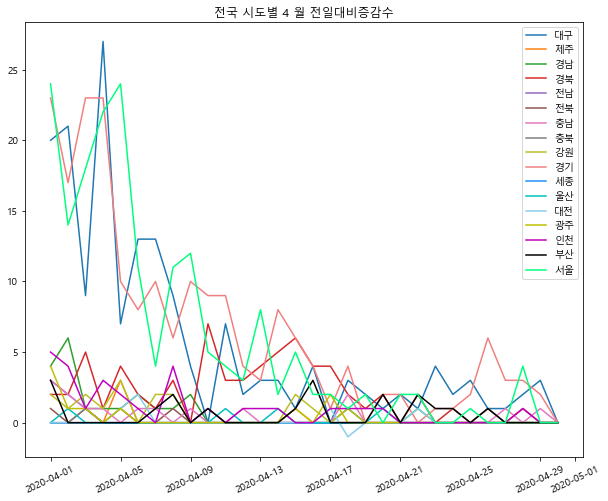

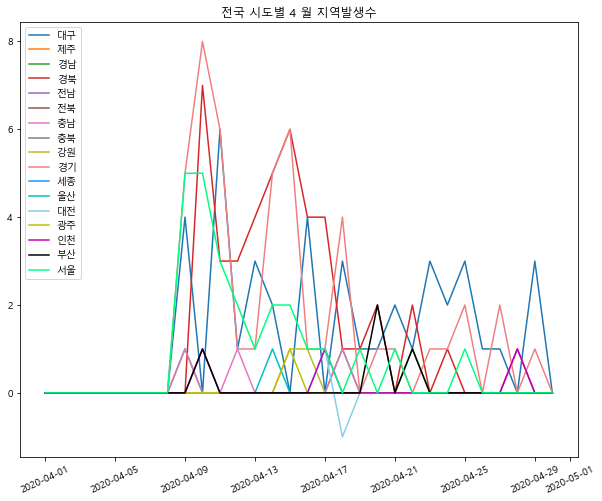

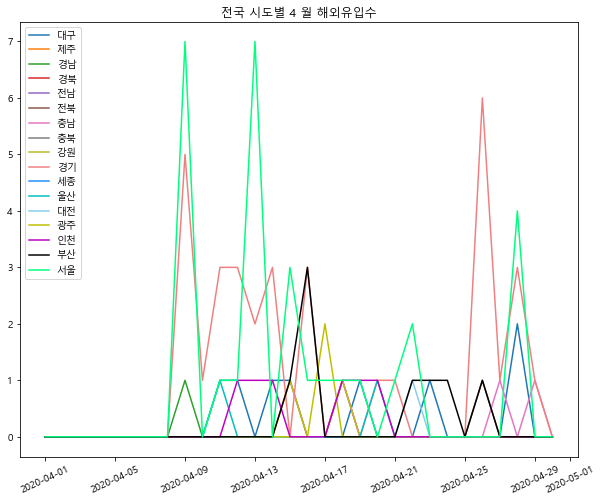

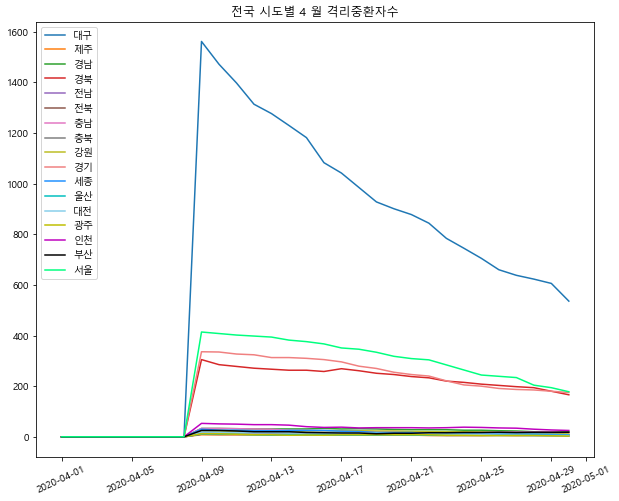

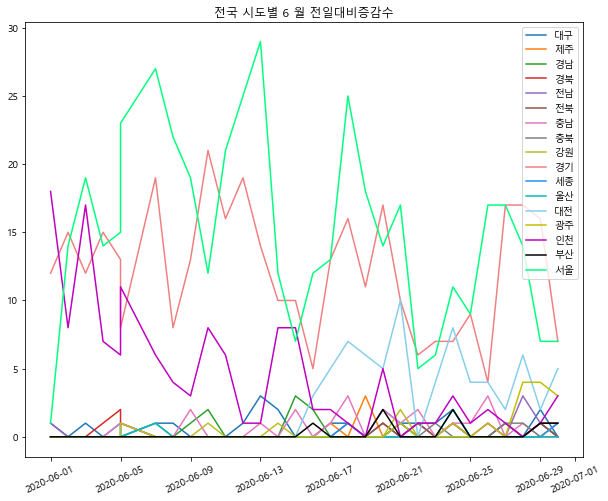

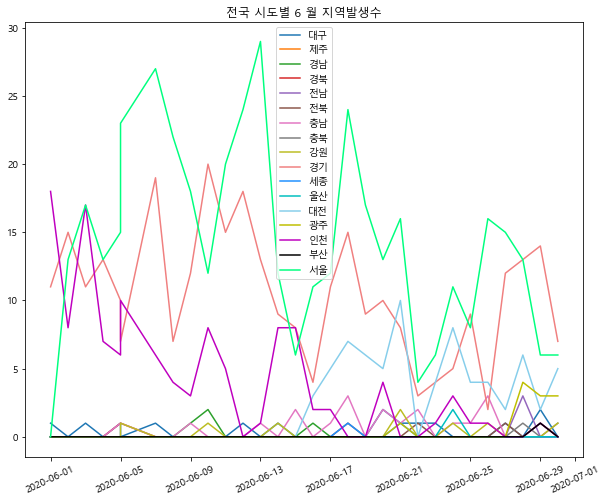

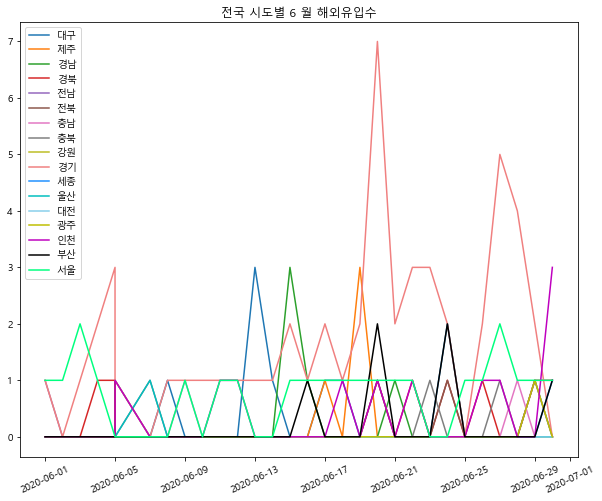

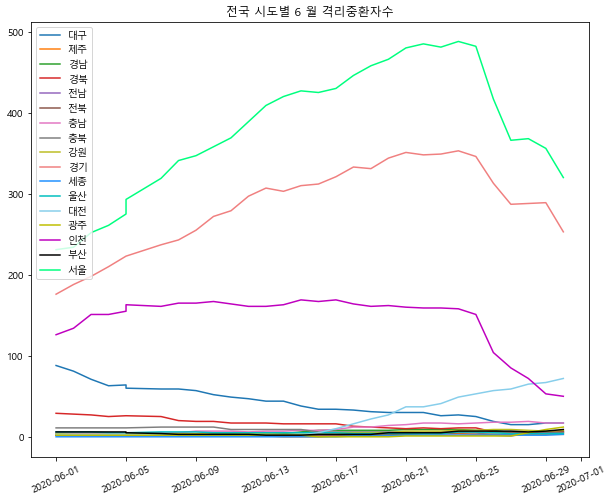

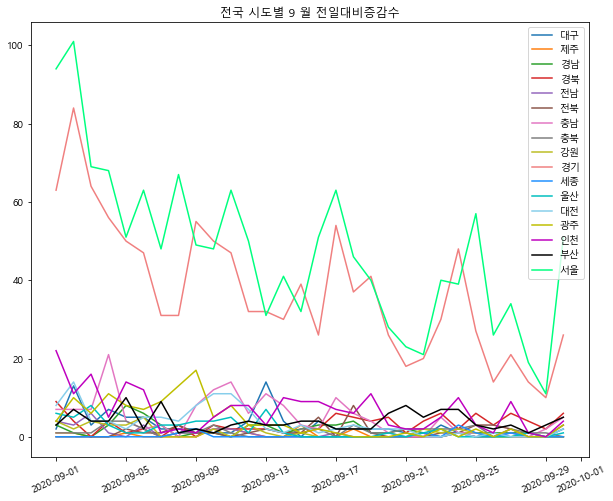

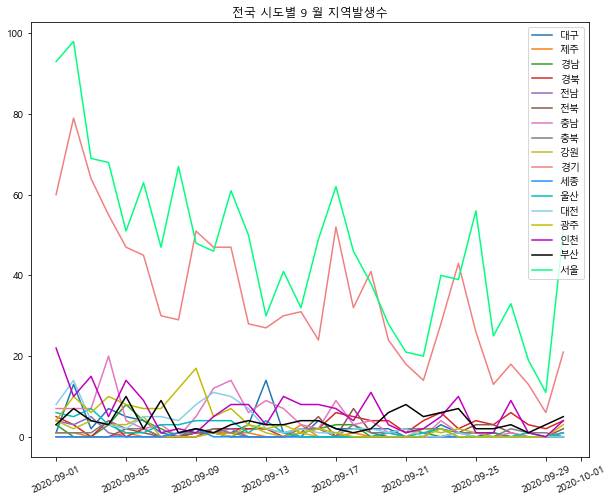

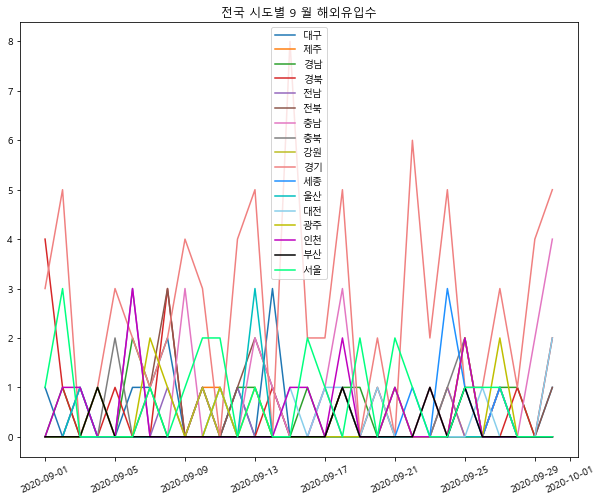

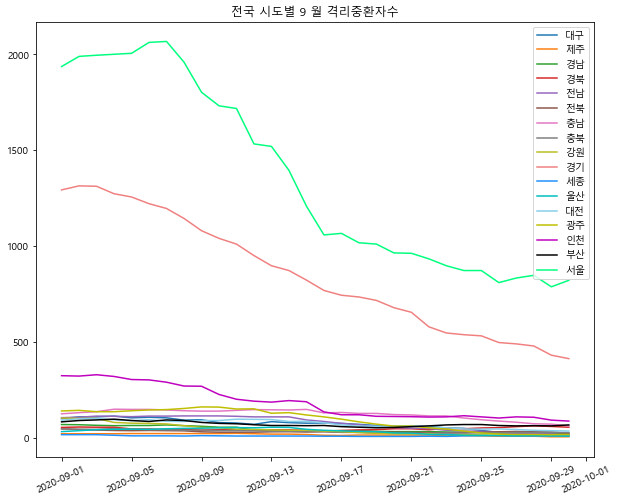

In [ ]:
a=0
while a in range(3):
    for tmp in col_list:
        draw_df_monthly_30(monthly_30[a], tmp)
    a=a+1

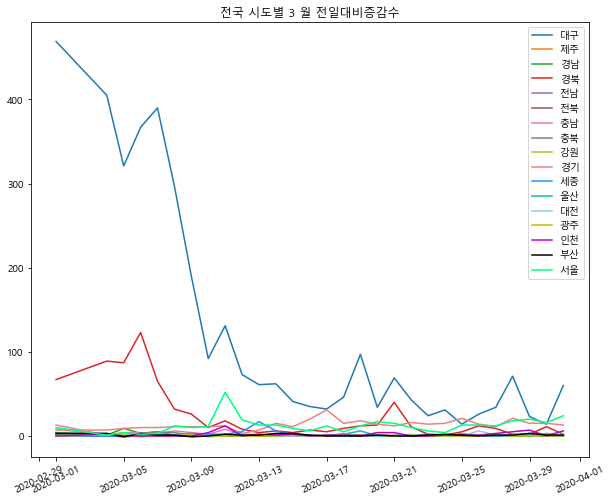

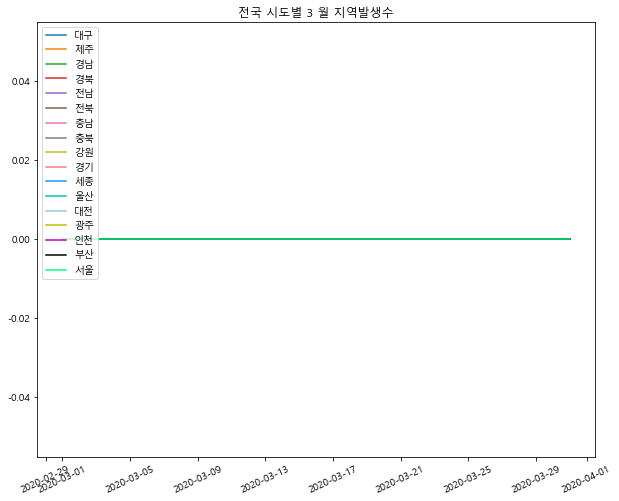

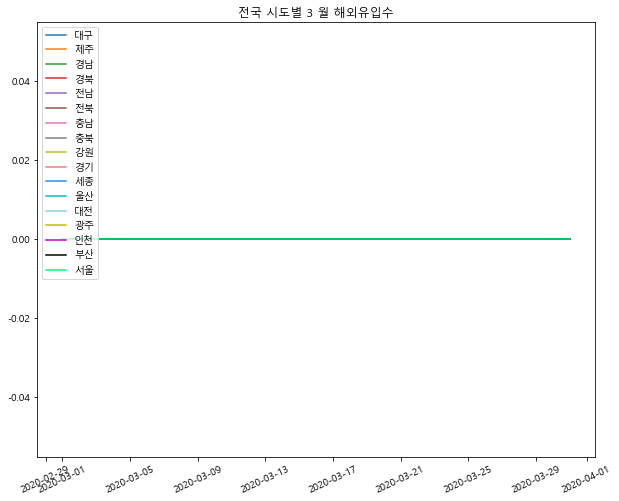

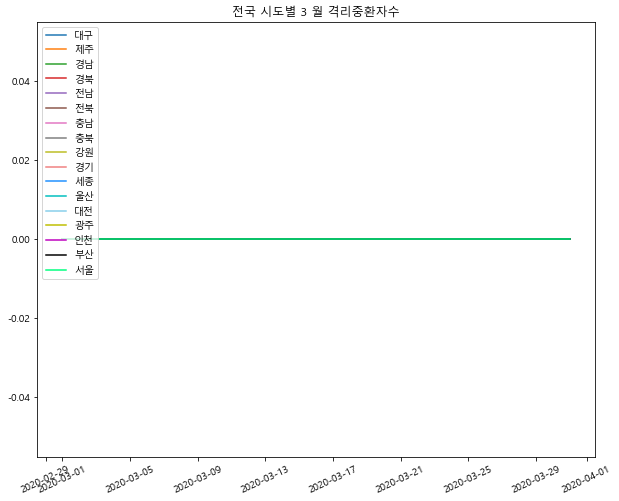

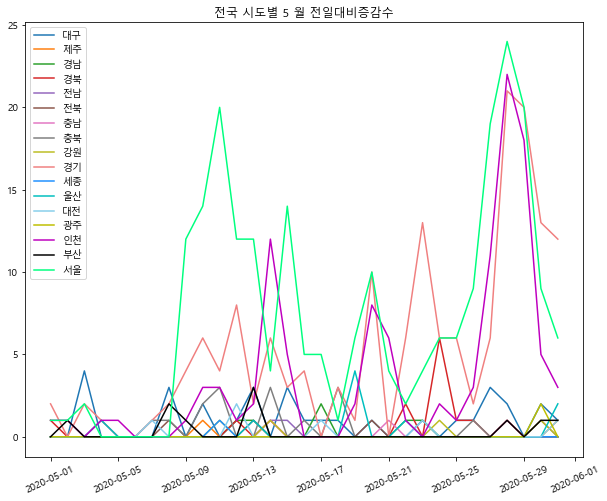

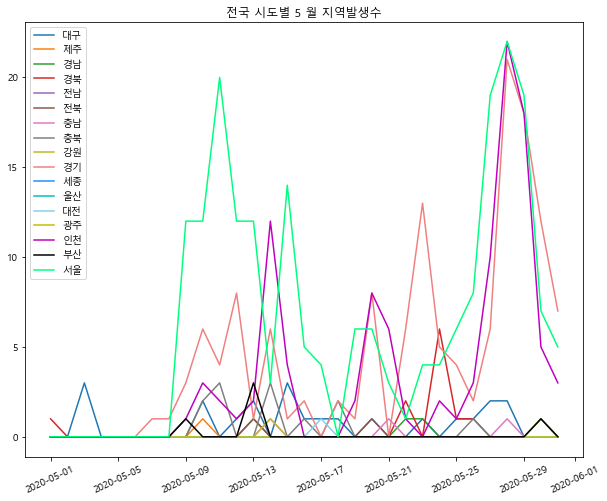

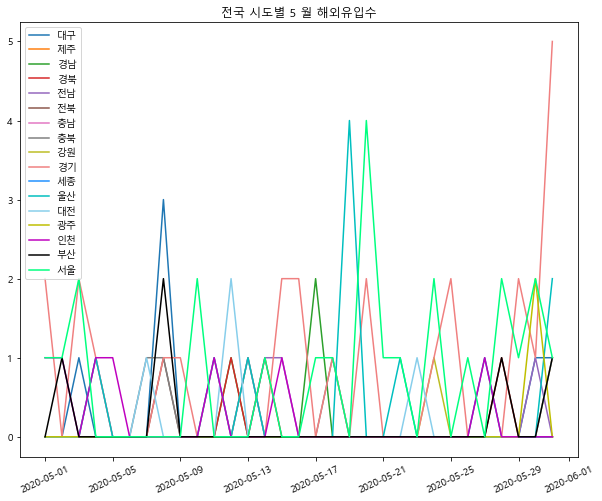

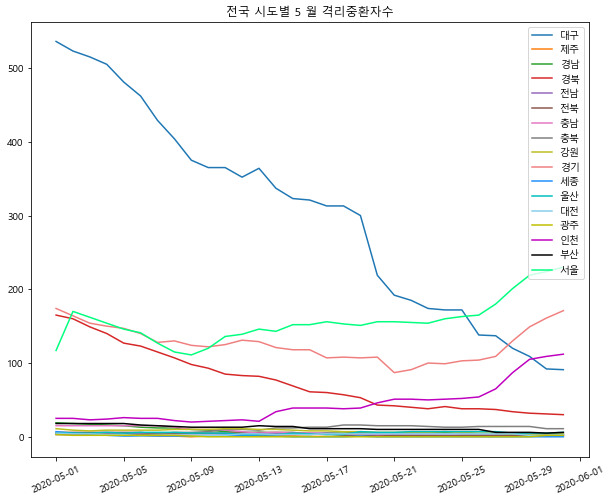

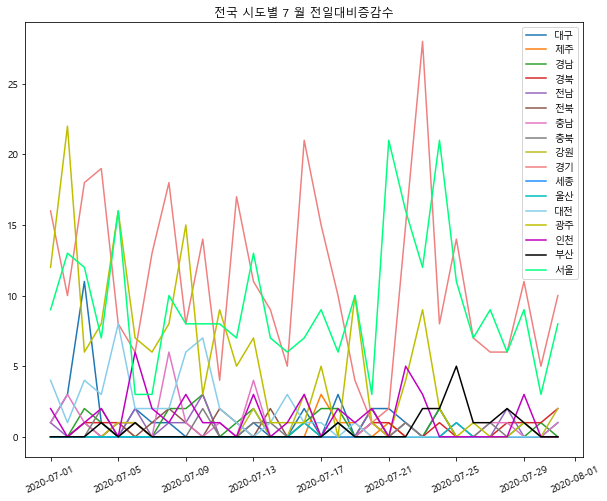

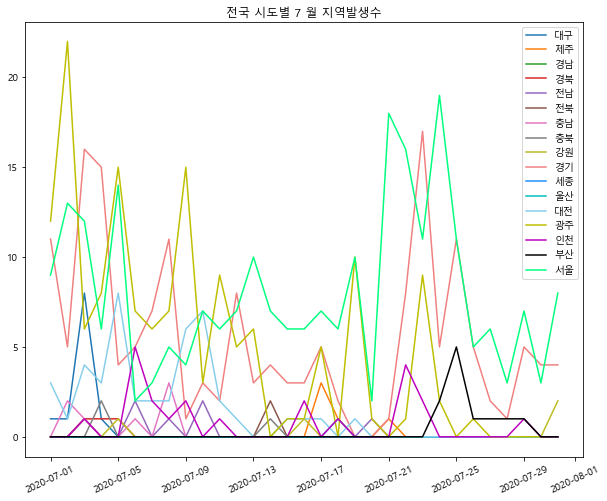

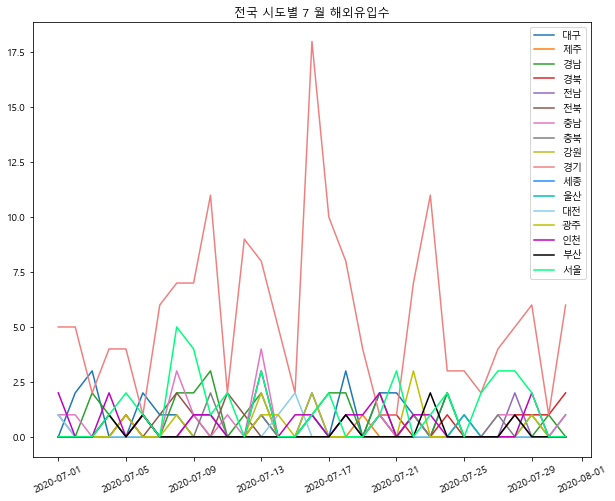

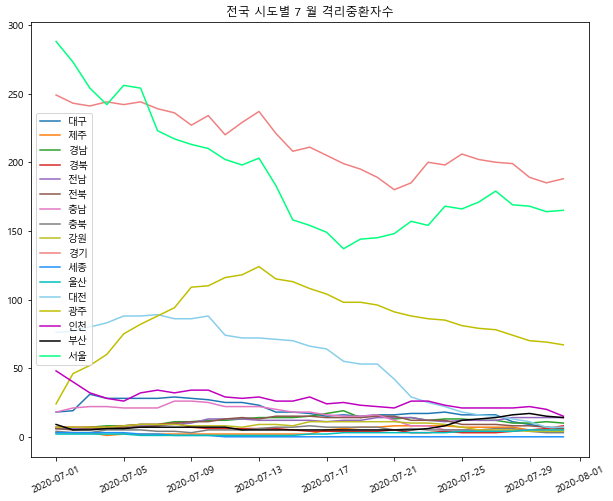

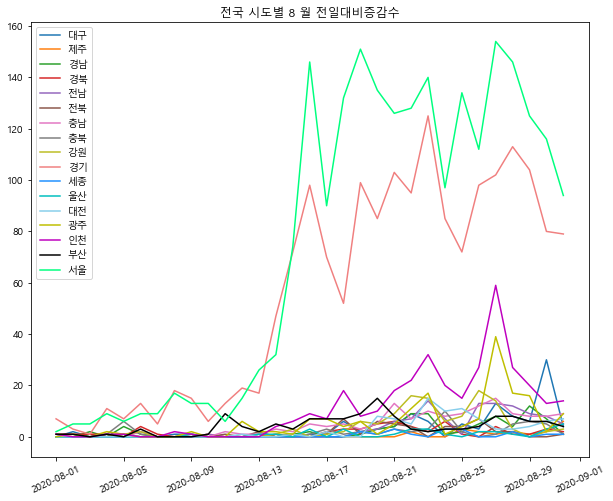

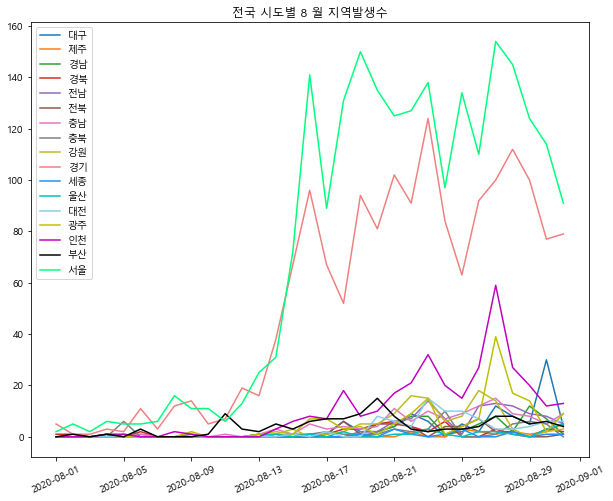

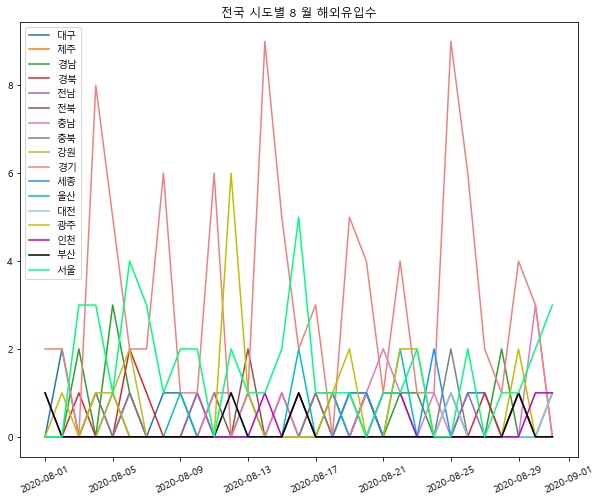

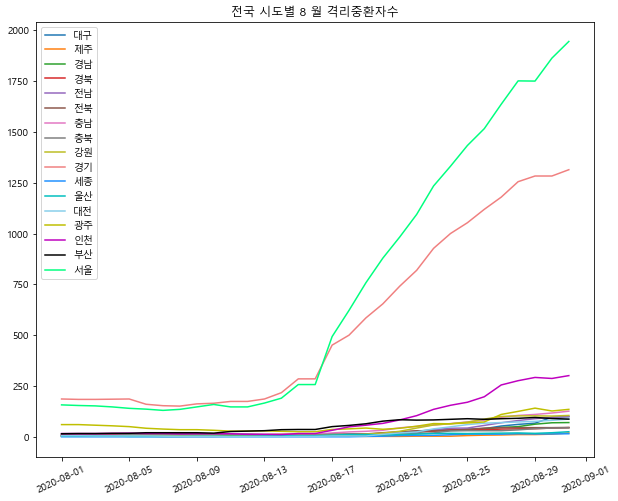

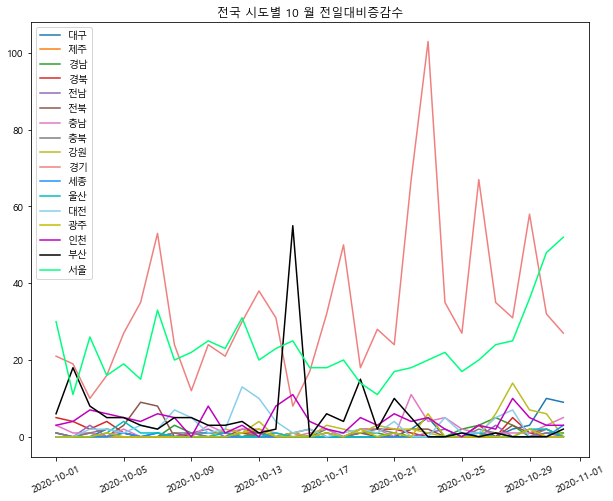

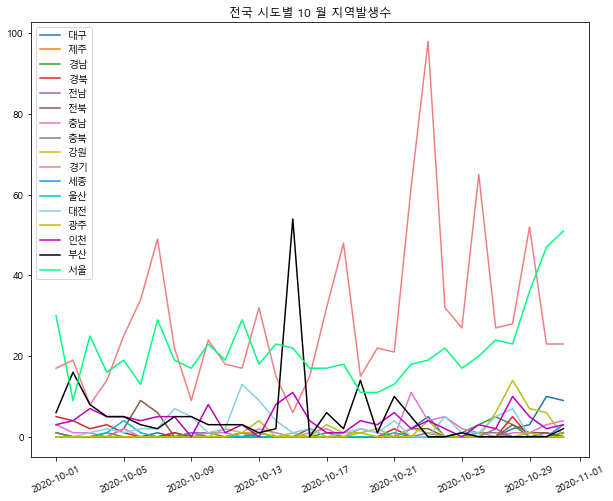

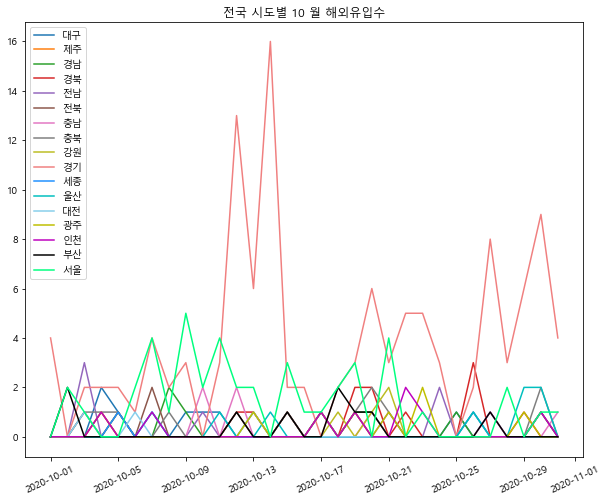

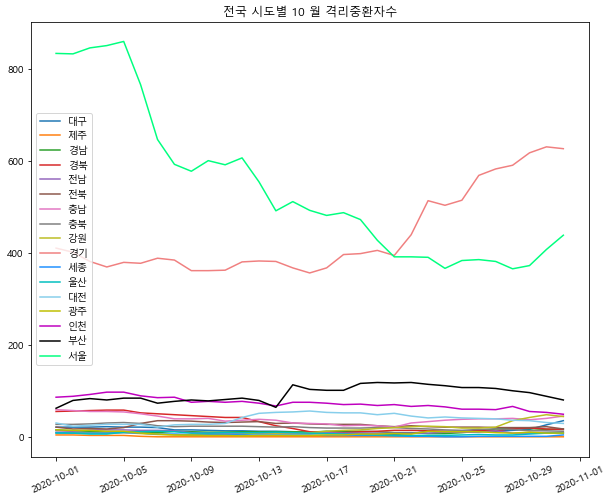

In [ ]:
a=0
while a in range(5):
    for tmp in col_list:
        draw_df_monthly_31(monthly_31[a], tmp)
    a=a+1

### 전국 전체기간 그래프

In [ ]:
df_total = df[df['시도명(한국어)'] == '합계']

In [ ]:
col_list= ['전일대비증감수', '10만명당발생률','확진자수', '지역발생수', '해외유입수', '격리중환자수', '격리해제수']
# 격리중 - 치료중 = 자가격리중
# 격리중, 격리해제 수

In [ ]:
def draw_df_total(y):
    plt.figure(figsize=(10,8))
    plt.plot(df_total['기준일시'], df_total[y])

    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    plt.xticks(rotation=25)
    plt.title('전체기간 전국 ' + y)
    plt.show()

In [ ]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 2020-03-02 19:27:57.57 to 2021-01-15 09:39:45.837
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사망자수          319 non-null    int64         
 1   시도명(한국어)      319 non-null    object        
 2   전일대비증감수       319 non-null    int64         
 3   10만명당발생률      318 non-null    float64       
 4   국내시도별발생현황고유값  319 non-null    int64         
 5   기준일시          319 non-null    datetime64[ns]
 6   확진자수          319 non-null    int64         
 7   지역발생수         319 non-null    int64         
 8   해외유입수         319 non-null    int64         
 9   격리중환자수        319 non-null    int64         
 10  격리해제수         319 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 29.9+ KB


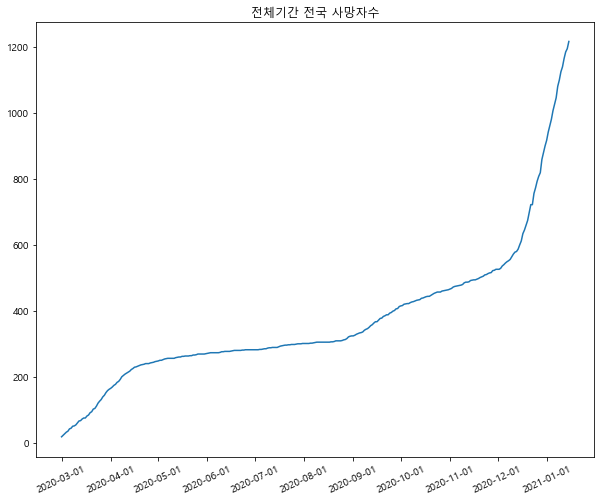

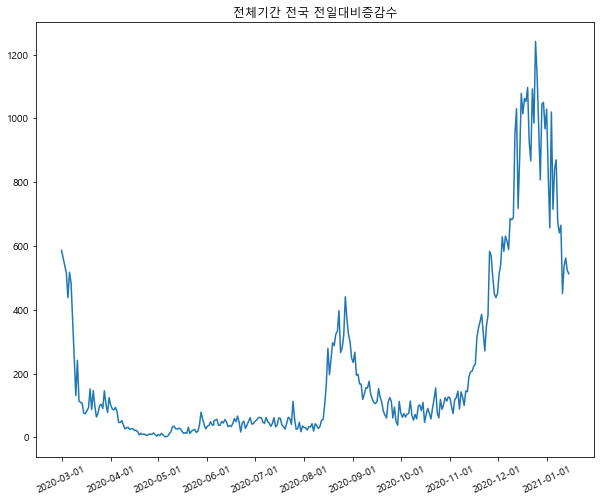

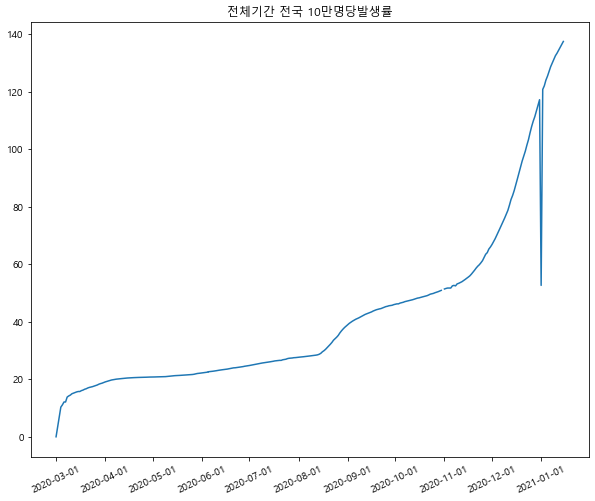

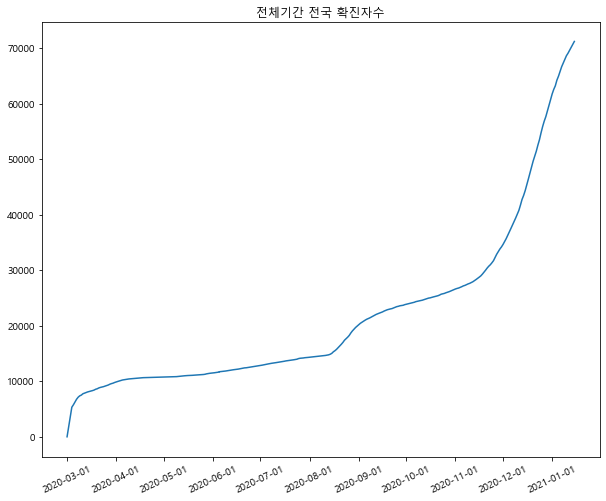

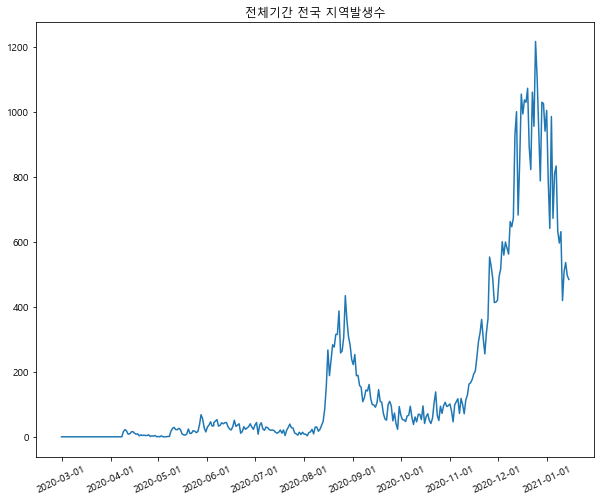

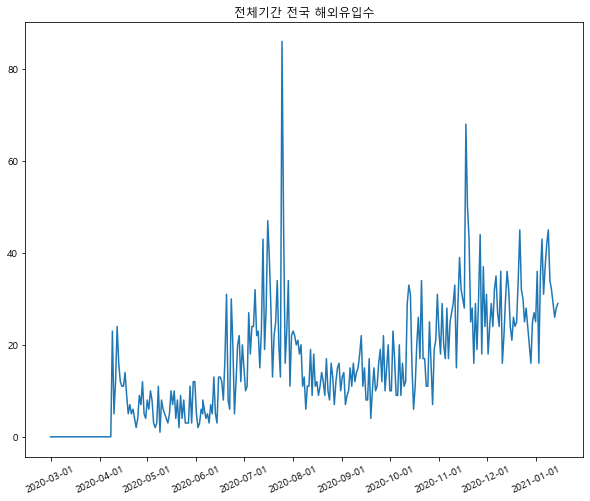

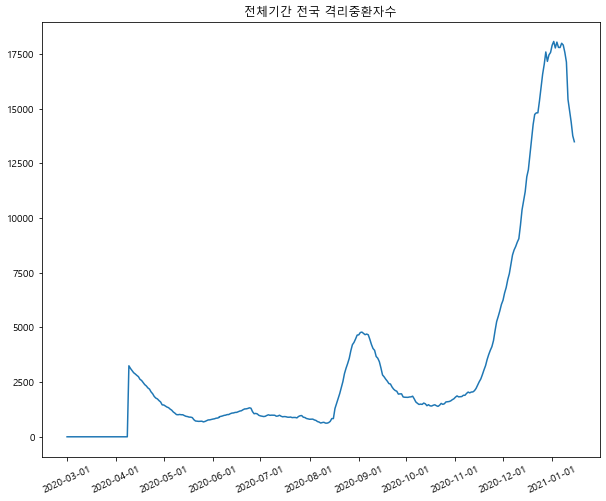

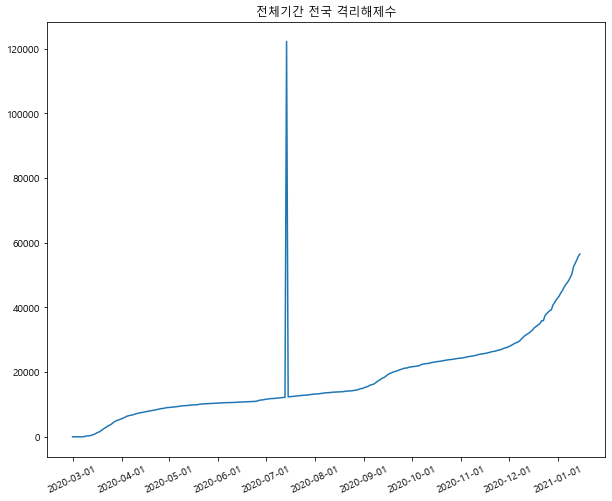

In [ ]:
for tmp in col_list:
    draw_df_total(tmp)

In [ ]:
df_jj = df[df['시도명(한국어)'] == '제주']
df_kn = df[df['시도명(한국어)'] == '경남']
df_kb = df[df['시도명(한국어)'] == '경북']
df_jn = df[df['시도명(한국어)'] == '전남']
df_jb = df[df['시도명(한국어)'] == '전북']
df_cn = df[df['시도명(한국어)'] == '충남']
df_cb = df[df['시도명(한국어)'] == '충북']
df_kw = df[df['시도명(한국어)'] == '강원']
df_kk = df[df['시도명(한국어)'] == '경기']
df_sj = df[df['시도명(한국어)'] == '세종']
df_us = df[df['시도명(한국어)'] == '울산']
df_dj = df[df['시도명(한국어)'] == '대전']
df_kj = df[df['시도명(한국어)'] == '광주']
df_ic = df[df['시도명(한국어)'] == '인천']
df_dg = df[df['시도명(한국어)'] == '대구']
df_bs = df[df['시도명(한국어)'] == '부산']
df_sl = df[df['시도명(한국어)'] == '서울']

In [ ]:
def draw_df_total_local(y):
    
    df_jj = df[df['시도명(한국어)'] == '제주']
    df_kn = df[df['시도명(한국어)'] == '경남']
    df_kb = df[df['시도명(한국어)'] == '경북']
    df_jn = df[df['시도명(한국어)'] == '전남']
    df_jb = df[df['시도명(한국어)'] == '전북']
    df_cn = df[df['시도명(한국어)'] == '충남']
    df_cb = df[df['시도명(한국어)'] == '충북']
    df_kw = df[df['시도명(한국어)'] == '강원']
    df_kk = df[df['시도명(한국어)'] == '경기']
    df_sj = df[df['시도명(한국어)'] == '세종']
    df_us = df[df['시도명(한국어)'] == '울산']
    df_dj = df[df['시도명(한국어)'] == '대전']
    df_kj = df[df['시도명(한국어)'] == '광주']
    df_ic = df[df['시도명(한국어)'] == '인천']
    df_dg = df[df['시도명(한국어)'] == '대구']
    df_bs = df[df['시도명(한국어)'] == '부산']
    df_sl = df[df['시도명(한국어)'] == '서울']
    
    gubun=['대구','제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종',
       '울산', '대전', '광주', '인천',  '부산', '서울']
    plt.figure(figsize=(10,8))
    
    plt.plot(df_dg['기준일시'], df_dg[y] ,label=gubun[0])
    plt.plot(df_jj['기준일시'], df_jj[y] ,label=gubun[1])
    plt.plot(df_kn['기준일시'], df_kn[y] ,label=gubun[2]) 
    plt.plot(df_kb['기준일시'], df_kb[y] ,label=gubun[3]) 
    plt.plot(df_jn['기준일시'], df_jn[y] ,label=gubun[4]) 
    plt.plot(df_jb['기준일시'], df_jb[y] ,label=gubun[5]) 
    plt.plot(df_cn['기준일시'], df_cn[y] ,label=gubun[6]) 
    plt.plot(df_cb['기준일시'], df_cb[y] ,label=gubun[7]) 
    plt.plot(df_kw['기준일시'], df_kw[y] ,label=gubun[8]) 
    plt.plot(df_kk['기준일시'], df_kk[y] ,label=gubun[9], color='lightcoral')
    plt.plot(df_sj['기준일시'], df_sj[y] ,label=gubun[10], color='dodgerblue')
    plt.plot(df_us['기준일시'], df_us[y] ,label=gubun[11], color='c')
    plt.plot(df_dj['기준일시'], df_dj[y] ,label=gubun[12], color='skyblue')
    plt.plot(df_kj['기준일시'], df_kj[y] ,label=gubun[13], color='y')
    plt.plot(df_ic['기준일시'], df_ic[y] ,label=gubun[14], color='m')
    plt.plot(df_bs['기준일시'], df_bs[y] ,label=gubun[15], color='black')
    plt.plot(df_sl['기준일시'], df_sl[y] ,label=gubun[16], color='springgreen')



    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax = plt.gca()
    xfmt = md.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(xfmt)
    plt.xticks(rotation=25)
    ax.legend()
    plt.title('전국 시도 ' + y)
    plt.show()

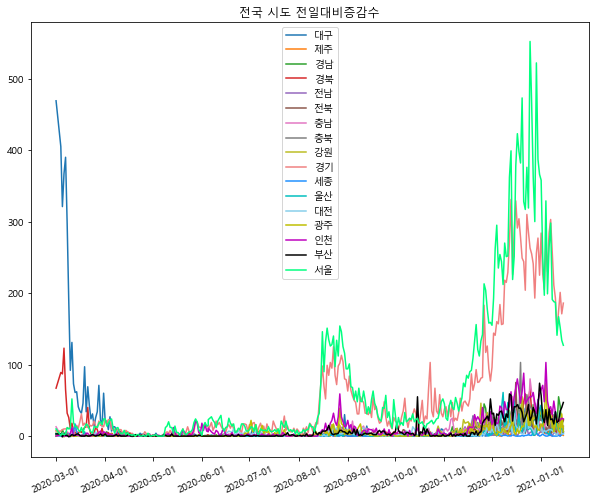

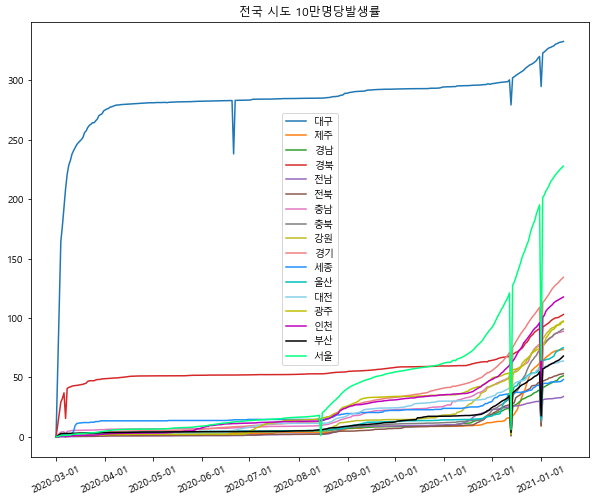

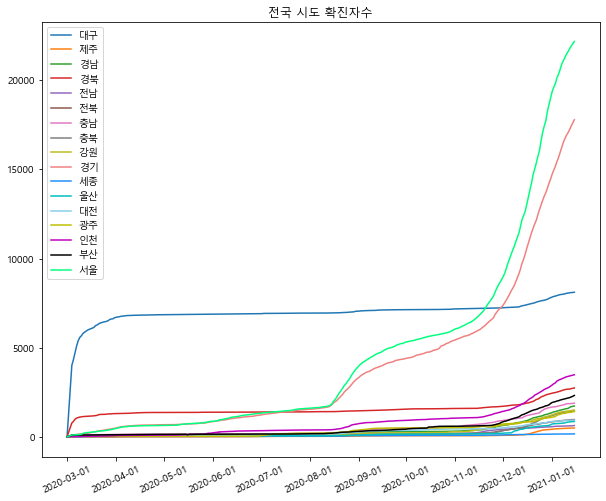

In [ ]:
#draw_df_total_local('10만명당 발생률') - 꺾은선 그래프는 별로
for tmp in col_list[:3]:
    draw_df_total_local(tmp)

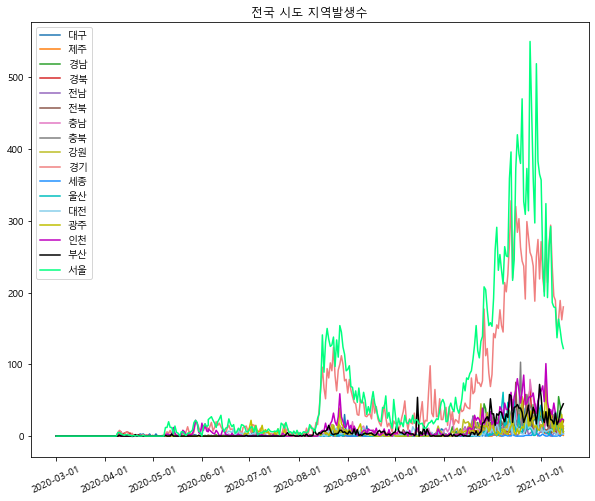

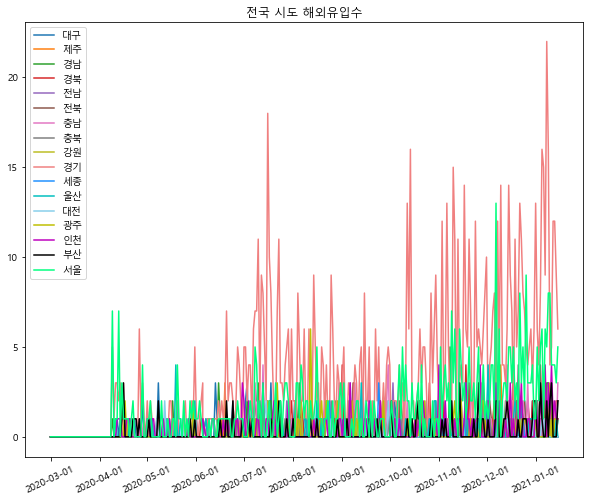

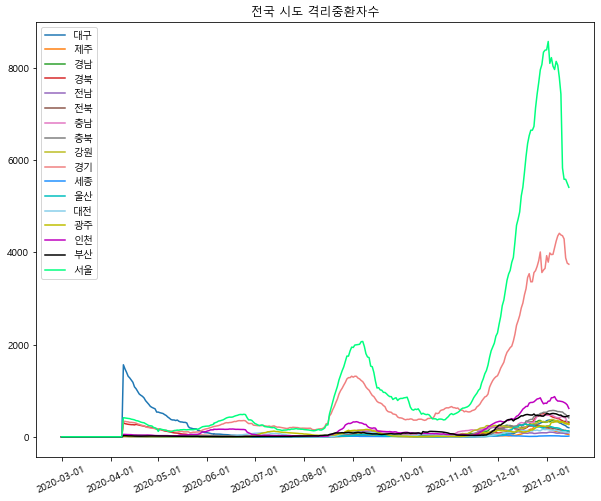

In [ ]:
for tmp in col_list[3:6]:
    draw_df_total_local(tmp)

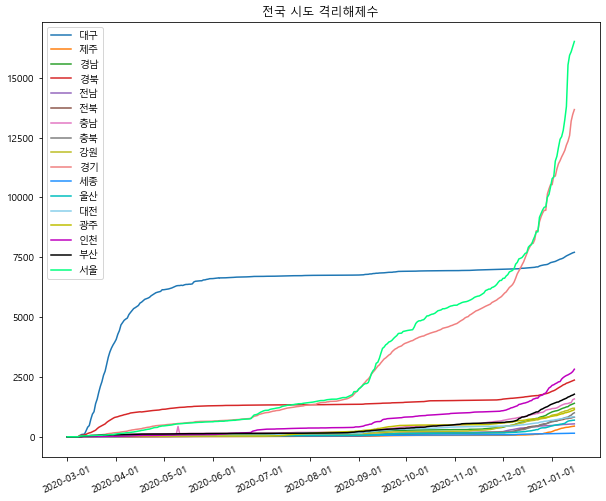

In [ ]:
for tmp in col_list[6:]:
    draw_df_total_local(tmp)

현지님께...   
version 수정사항 알려드립니다 :)   

* 그래프 지역 구분 안되는 것 색상 구분 완료했습니다.   
https://blog.naver.com/samsjang/220771392035
* matplotlib이 애니메이션이 가능하다고 하네용...

* 추가로 기사는 https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220769198156&proxyReferer=https:%2F%2Fwww.google.com%2F 주석달기...생각해봤습니다...